<a href="https://colab.research.google.com/github/rakibulalamshamim/MAT120lab/blob/main/Lab_Final_Solution_Section_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
from sympy import *

p, q = 2, 3         # for example

In [22]:
#1a
x = symbols('x')
y = (sin(p*x)+cos(q*x))/(p+x**2*ln(x))
f = 2*diff(y, x, 2)- diff(y) + 3*y
display(f)

-(-2*x*log(x) - x)*(sin(2*x) + cos(3*x))/(x**2*log(x) + 2)**2 + 3*(sin(2*x) + cos(3*x))/(x**2*log(x) + 2) - (-3*sin(3*x) + 2*cos(2*x))/(x**2*log(x) + 2) + 2*(2*x*(2*log(x) + 1)*(3*sin(3*x) - 2*cos(2*x))/(x**2*log(x) + 2) - 4*sin(2*x) - 9*cos(3*x) - (sin(2*x) + cos(3*x))*(-2*x**2*(2*log(x) + 1)**2/(x**2*log(x) + 2) + 2*log(x) + 3)/(x**2*log(x) + 2))/(x**2*log(x) + 2)

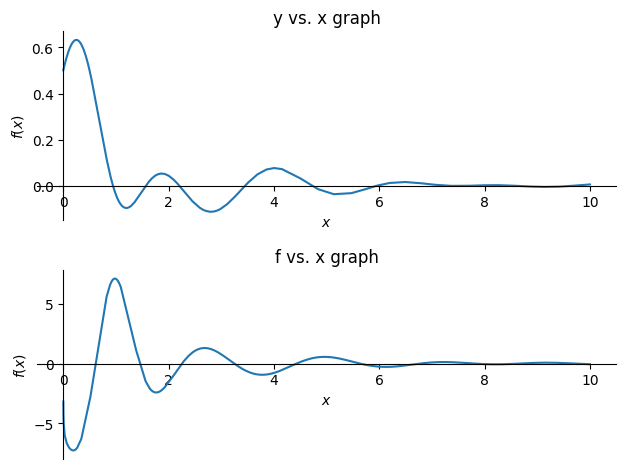

In [24]:
#1b
from sympy.plotting import PlotGrid
p1 = plot(y, title="y vs. x graph" , show=False)
p2 = plot(f, title="f vs. x graph" , show=False)
PlotGrid(2, 1, p1, p2)

In [6]:
#2a
x, y, z = symbols('x y z')
phi = 5*x*z*ln(p+y**q) - 2*p*y**2*exp(4*x*z)

phixx= diff(phi, x, x)
phiyy= diff(phi, y, y)
phizz= diff(phi, z, z)
display(phixx, phiyy, phizz)
Laplacian = phixx+phiyy+phizz

display("Laplacian=", Laplacian)

-64*y**2*z**2*exp(4*x*z)

-45*x*y**4*z/(y**3 + 2)**2 + 30*x*y*z/(y**3 + 2) - 8*exp(4*x*z)

-64*x**2*y**2*exp(4*x*z)

'Laplacian='

-64*x**2*y**2*exp(4*x*z) - 45*x*y**4*z/(y**3 + 2)**2 + 30*x*y*z/(y**3 + 2) - 64*y**2*z**2*exp(4*x*z) - 8*exp(4*x*z)

In [7]:
#2b
integrate(asin(x)**p/sqrt(1-x**2), (x, 0, 1))

pi**3/24

In [26]:
#3
# First integral
a, b, n = 0, np.pi/2, 1000
h = (b-a)/n
def y(x): return np.exp(p*np.cos(q+x))
x = np.linspace(a, b, n+1)
I = y(a) + y(b)
for i in range(1, n):
  I = I + 2*y(x[i])
print('Approximate value of the first integral: ', I*h/2)


Approximate value of the first integral:  0.4334052497794604


In [ ]:
# Second Integral

a, b, n, t, dummy_var = 0, 10, 1000, 10**(-3), 20
def y(x): return np.cos((x**3-p*x)/(x**2-q))/x**2
while True:
  h = (b-a)/n
  x = np.linspace(a, b, n+1)
  I = y(a) + y(b)
  for i in range(1, n):
    I = I + 2*y(x[i])
  Trapzoid = I*h/2
  if np.fabs(Trapzoid - dummy_var)<t:
    break
  else:
    dummy_var = Trapzoid
    b+=1
print('Approximate value of the second integral: ', Trapzoid)

<ipython-input-27-729f30983d58>:4: RuntimeWarning: divide by zero encountered in double_scalars
  def y(x): return np.cos((x**3-p*x)/(x**2-q))/x**2
<ipython-input-27-729f30983d58>:12: RuntimeWarning: invalid value encountered in double_scalars
  if np.fabs(Trapzoid - dummy_var)<t:


In [ ]:
#4a

L, R, t = symbols('L R t')
I = symbols('I', cls= Function)
LHS = L*diff(I(t),t) + R*I(t)
V   = 2*exp(-p*t) + 5*p*cos(4*t)
eqn1 = Eq(LHS, V)
soln= dsolve(eqn1, ics= {I(0):0})
soln

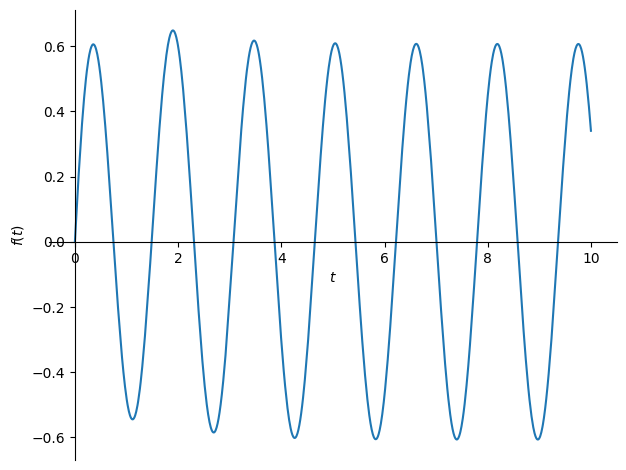

In [15]:
#4b
rl = soln.rhs.subs(L, 2*p).subs(R, 1+q)
plot(rl, (t, 0, 10))

4b. Observing from the graph it is evident that the current, in fact is AC with small variance in its amplitude.

In [16]:
#5a
L, R, t = symbols('L R t')
Q = symbols('Q', cls= Function)
LHS = L*diff(Q(t),t, 2) + R*diff(Q(t),t)
eqn = Eq(LHS, 2*p)
soln= dsolve(eqn, ics= {Q(0):0, diff(Q(t),t).subs(t, 0):10})
soln

Eq(Q(t), 4*t/R + (-10*L*R + 4*L)*exp(-R*t/L)/R**2 + (10*L*R - 4*L)/R**2)

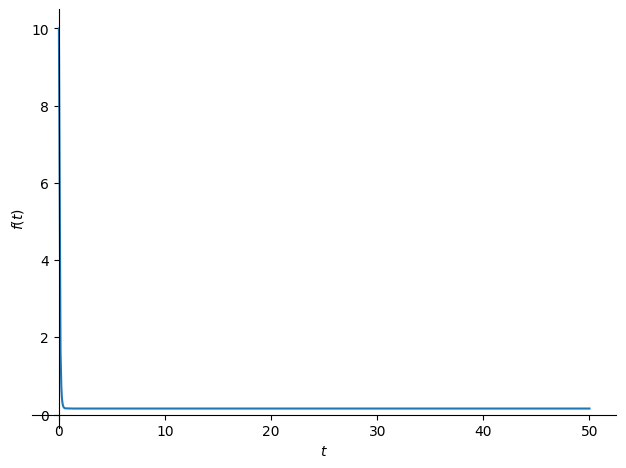

In [17]:
#5b
I = diff(soln.rhs, t).subs(L, p).subs(L, 2*p).subs(R, 10+5*q)
plot(I, (t, 0, 50))

<function matplotlib.pyplot.show(close=None, block=None)>

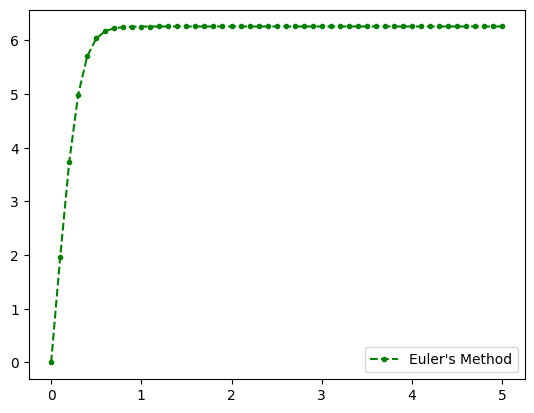

In [18]:
#6a
import numpy as np
import matplotlib.pyplot as plt

def f(t,v): return p*9.8 - 0.5*v**2

t0, tn = 0, 5
h      = 0.1
t      = np.arange(t0, tn+h, h)
v      = np.zeros(len(t))
v[0]   = 0

for i in range(0, len(t)-1):
    v[i + 1] = v[i] + h*f(t[i], v[i])

plt.plot(t, v, color='green', linestyle='dashed', marker='.', label="Euler's Method")
plt.legend()
plt.show

6b. The velocity reaches to a steady constant value called terminal velocity as time becomes very large.